In [3]:
from sklearn.datasets import load_digits

In [4]:
mnist = load_digits()

In [7]:
#print(mnist)

In [9]:
X,y = mnist['data'], mnist['target']

In [10]:
X.shape

(1797, 64)

In [11]:
y.shape

(1797,)

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

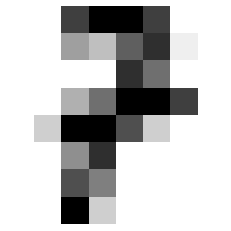

In [21]:
some_dig =  X[1200]
some_dig_img =  some_dig.reshape(8,8)
plt.imshow(some_dig_img,cmap = matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [22]:
y[1200]

7

In [23]:
X_train,X_test,y_train,y_test =  X[:1000],X[1000:],y[:1000],y[1000:]

In [24]:
import numpy as np
sel_ind =  np.random.permutation(1000)
X_train,y_train =  X_train[sel_ind],y_train[sel_ind]

In [25]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [27]:
from sklearn.linear_model import SGDClassifier

In [30]:
# y_train_7

In [31]:
clf =  SGDClassifier(random_state=42)
clf.fit(X_train,y_train_7)

SGDClassifier(random_state=42)

In [34]:
clf.predict([some_dig])

array([ True])

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [40]:
skfold =  StratifiedKFold(n_splits=3, random_state=42,shuffle=True)

In [41]:
for train_ind,test_ind in skfold.split(X_train,y_train_7):
    clone_clf =  clone(clf)
    X_train_fold =  X_train[train_ind]
    X_test_fold =  X_train[test_ind]
    y_train_fold = y_train_7[train_ind]
    y_test_fold = y_train_7[test_ind]
    clone_clf.fit(X_train_fold,y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_corr =  sum(y_pred == y_test_fold)
    print(n_corr/len(y_pred))

0.9790419161676647
0.984984984984985
0.987987987987988


In [42]:
from sklearn.model_selection import cross_val_score

In [44]:
val = cross_val_score(clf,X_train,y_train_7,cv=3,scoring='accuracy')

In [46]:
val.mean()

0.980989972007936

In [53]:
np.zeros((len(X), 1),dtype=bool)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [54]:
from sklearn.base import BaseEstimator

In [63]:
class Never7Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [64]:
never_clf = Never7Classifier()

In [66]:
cross_val_score(never_clf,X_train,y_train_7,cv=3,scoring='accuracy').mean()

0.9010117902333471

In [67]:
from sklearn.model_selection import cross_val_predict

In [68]:
y_pred_k  = cross_val_predict(clf,X_train,y_train_7,cv=3)

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_train_7,y_pred_k)

array([[888,  13],
       [  6,  93]])

In [71]:
from sklearn.metrics import precision_score, recall_score

In [72]:
precision_score(y_train_7,y_pred_k)

0.8773584905660378

In [73]:
recall_score(y_train_7,y_pred_k)

0.9393939393939394

In [74]:
from sklearn.metrics import f1_score

In [75]:
f1_score(y_train_7,y_pred_k)

0.9073170731707318

In [77]:
y_scores = clf.decision_function([some_dig])

In [78]:
y_scores

array([819.31831076])

In [81]:
y_scores = cross_val_predict(clf, X_train, y_train_7, cv=3,method="decision_function")

In [82]:
from sklearn.metrics import precision_recall_curve

In [83]:
precision, recall, threshold =  precision_recall_curve(y_train_7,y_scores)

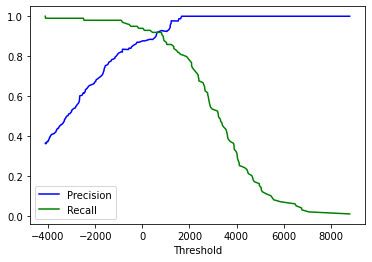

In [88]:
def plot_precision_recall_threshold(precision, recall, threshold):
    plt.plot(threshold,precision[:-1],label='Precision',c='b')
    plt.plot(threshold,recall[:-1],label='Recall',c='g')
    plt.xlabel('Threshold')
    plt.legend(loc='best')
#     plt.ylim([0,1])
plot_precision_recall_threshold(precision, recall, threshold)
plt.show()

Text(0, 0.5, 'Recall')

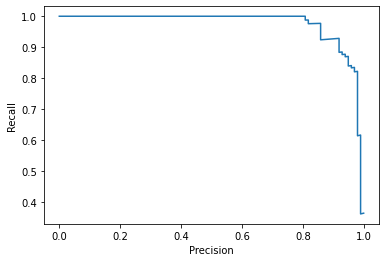

In [92]:
plt.plot(recall,precision)
plt.xlabel('Precision')
plt.ylabel('Recall')